In [1]:
#Import scikit-learn dataset library
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
 
from datetime import datetime
start_time = datetime.now()

In [2]:
df = pd.read_excel('F://UCSI_research//PG_Matters//Chan Kok Pin//post-viva//Dataset//Regression_data//Mango_drymatter//DM_mango.xlsx')   
# df = pd.read_excel('F://UCSI_research//PG_Matters//Chan Kok Pin//post-viva//Dataset//Regression_data//Mango_drymatter//DM_mango_snv.xlsx')   

X = df.iloc[: , 1:]
Y = df.iloc[:, 0]


# print(len(Y))
# print(len(X))
print(X.shape)
print(Y.shape)

(11362, 103)
(11362,)


In [3]:
df.head(5)

,DM,684,687,690,693,696,699,702,705,708,...,963,966,969,972,975,978,981,984,987,990
0,16.792506,-0.187572,-0.271236,-0.351005,-0.418628,-0.471548,-0.510750,-0.538847,-0.558357,-0.572195,...,-0.291061,-0.283766,-0.277665,-0.276466,-0.275833,-0.277469,-0.279087,-0.281585,-0.286274,-0.291861
1,16.792506,-0.183253,-0.267107,-0.347271,-0.415050,-0.468100,-0.507443,-0.535537,-0.555035,-0.569050,...,-0.288114,-0.280321,-0.275603,-0.273691,-0.272281,-0.273021,-0.275661,-0.277798,-0.282546,-0.287625
2,16.070979,-0.240969,-0.313623,-0.381965,-0.439224,-0.483448,-0.515665,-0.538356,-0.553933,-0.564771,...,-0.285849,-0.278140,-0.273570,-0.270683,-0.270807,-0.272077,-0.273772,-0.277118,-0.280703,-0.286242
3,16.070979,-0.240610,-0.313087,-0.381506,-0.439003,-0.483402,-0.515663,-0.538322,-0.553813,-0.564752,...,-0.284648,-0.277382,-0.273996,-0.272173,-0.269741,-0.270569,-0.273172,-0.276150,-0.280397,-0.286027
4,16.394013,0.056370,-0.049269,-0.158413,-0.257995,-0.341550,-0.407727,-0.458308,-0.496121,-0.524892,...,-0.292278,-0.284616,-0.280153,-0.276646,-0.274851,-0.276203,-0.277353,-0.279749,-0.284363,-0.290519


Text(0.5, 0, 'Dry matter content (%)')

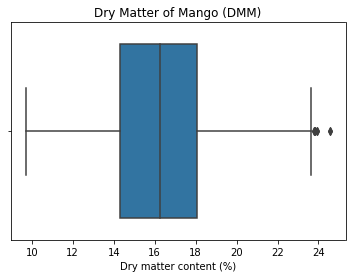

In [4]:

sns.boxplot(x=df["DM"])
plt.title('Dry Matter of Mango (DMM)', fontsize = 12)
plt.xlabel('Dry matter content (%)')

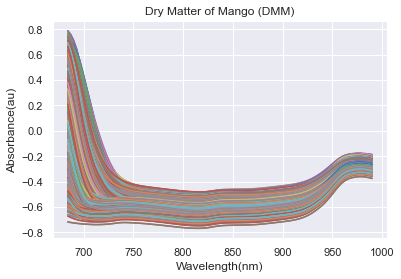

In [5]:
 #add print spectrum...
import seaborn as sns
sns.set_theme()

X1 = df.values[:, 1:].astype('float32')  
y_toc = df.values[:,0]    
wl = np.linspace(684,990, num=X1.shape[1], endpoint=True)   #wavelength range
plt.plot(wl,X1.T)
plt.title('Dry Matter of Mango (DMM)', fontsize = 12)
plt.xlabel(r'Wavelength(nm)', fontsize=12)
plt.ylabel('Absorbance(au)', fontsize=12)
plt.savefig('mango DMM spectroscopy.png', dpi=300)
plt.show()

In [6]:
#train set,test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)  

In [7]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(8521, 103)
(8521,)
(2841, 103)
(2841,)


In [8]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
LGB=lgb.LGBMRegressor(verbose=0)

In [9]:
# #tuning   hyperparameters
paramsDT={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 8)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
paramsRF = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


paramsLGB={'n_estimators':[100,200,300,400,500], 'learning_rate':[0.25,0.5,0.75, 1],'reg_alpha':[0,0.01,0.05,0.1]}


# TUNING DT

In [10]:
DT1 = RandomizedSearchCV(estimator = DT, param_distributions = paramsDT, n_iter = 10, 
                               cv = 3, verbose=3, random_state=0, n_jobs = -1)

DT1.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                                                                     0.3, 0.4,
                                                                     0.5, 0.6,
                                                                     0.7, 0.8,
                                                                     0.9],


In [11]:
best_DT = DT1.best_estimator_
print(best_DT)


DecisionTreeRegressor(max_depth=9, max_features='auto', max_leaf_nodes=80,
                      min_samples_leaf=10, min_weight_fraction_leaf=0.1,
                      splitter='random')


In [12]:
# train the model with its best paramaters
best_DT.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto', max_leaf_nodes=80,
                      min_samples_leaf=10, min_weight_fraction_leaf=0.1,
                      splitter='random')

In [13]:
dt_p1 = best_DT.predict(X_train)
dt_p2 = best_DT.predict(X_test)
print('DT result')
print('train R^2: %.2f' % r2_score(Y_train, dt_p1))
print('train MAE: %.2f' % mean_absolute_error(Y_train, dt_p1))
print('test  R^2: %.2f' % r2_score(Y_test, dt_p2))
print('test  MAE: %.2f' % mean_absolute_error(Y_test, dt_p2))

DT result
train R^2: 0.18
train MAE: 1.76
test  R^2: 0.16
test  MAE: 1.82


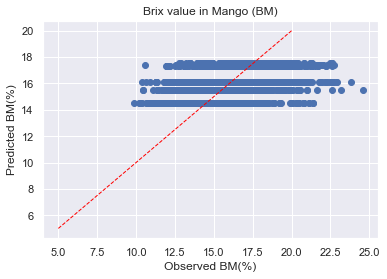

In [14]:
# plot prediction
sns.set_theme()
plt.scatter(Y_test,dt_p2)
x=np.linspace(5,20,10)
y=x
plt.plot(x,y,color='red',linewidth=1.0,linestyle='--',label='line')
#plt.legend(["y = x","predict"])
 
plt.title("Brix value in Mango (BM)")
plt.xlabel('Observed BM(%)')
plt.ylabel('Predicted BM(%)')
plt.savefig('brix-mango-graph.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

# TUNING LGBM

In [15]:
LGB1 = RandomizedSearchCV(estimator = LGB, param_distributions = paramsLGB, n_iter = 10, 
                               cv = 3, verbose=3, random_state=0, n_jobs = -1)

LGB1.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024975 seconds.
You can set `force_col_wise=true` to remove the overhead.


RandomizedSearchCV(cv=3, estimator=LGBMRegressor(verbose=0), n_jobs=-1,
                   param_distributions={'learning_rate': [0.25, 0.5, 0.75, 1],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.01, 0.05, 0.1]},
                   random_state=0, verbose=3)

In [16]:
best_LGB = LGB1.best_estimator_
print(best_LGB)


LGBMRegressor(learning_rate=0.5, n_estimators=300, reg_alpha=0.05, verbose=0)


In [17]:
# train the model with its best paramaters
best_LGB.fit(X_train, Y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025398 seconds.
You can set `force_col_wise=true` to remove the overhead.


LGBMRegressor(learning_rate=0.5, n_estimators=300, reg_alpha=0.05, verbose=0)

In [18]:
lgb_p1 = best_LGB.predict(X_train)
lgb_p2 = best_LGB.predict(X_test)
print('LGBM result')
print('train R^2: %.2f' % r2_score(Y_train, lgb_p1))
print('train MAE: %.2f' % mean_absolute_error(Y_train, lgb_p1))
print('test  R^2: %.2f' % r2_score(Y_test, lgb_p2))
print('test  MAE: %.2f' % mean_absolute_error(Y_test, lgb_p2))
print('test  RMSE: %.2f' %  sqrt(mean_squared_error(Y_test, lgb_p2)))

LGBM result
train R^2: 1.00
train MAE: 0.12
test  R^2: 0.75
test  MAE: 0.90
test  RMSE: 1.23


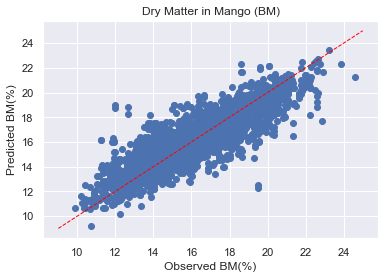

In [19]:
plt.scatter(Y_test,lgb_p2)
x=np.linspace(9,25,10)
y=x
plt.plot(x,y,color='red',linewidth=1.0,linestyle='--',label='line')
#plt.legend(["y = x","predict"])
 
plt.title("Dry Matter in Mango (BM)")
plt.xlabel('Observed BM(%)')
plt.ylabel('Predicted BM(%)')
plt.savefig('brix-mango-graph.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

# TUNING RF

In [ ]:
RF1 = RandomizedSearchCV(estimator = RF, param_distributions = paramsRF, n_iter = 10, 
                               cv = 3, verbose=3, random_state=0, n_jobs = -1)

RF1.fit(X_train, Y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
best_RF = RF1.best_estimator_
print(best_RF)


In [ ]:
# train the model with its best paramaters
best_RF.fit(X_train, Y_train)

In [ ]:
rf_p1 = best_RF.predict(X_train)
rf_p2 = best_RF.predict(X_test)
print('RF result')
print('train R^2: %.2f' % r2_score(Y_train, rf_p1))
print('train MAE: %.2f' % mean_absolute_error(Y_train, rf_p1))
print('test  R^2: %.2f' % r2_score(Y_test, rf_p2))
print('test  MAE: %.2f' % mean_absolute_error(Y_test, rf_p2))
print('test  RMSE: %.2f' %  sqrt(mean_squared_error(Y_test, rf_p2)))

In [ ]:
plt.scatter(Y_test,rf_p2)
x=np.linspace(9,25,10)
y=x
plt.plot(x,y,color='red',linewidth=1.0,linestyle='--',label='line')
#plt.legend(["y = x","predict"])
 
plt.title("Dry Matter  in Mango (DMM)")
plt.xlabel('Observed DM(%)')
plt.ylabel('Predicted MM(%)')
plt.savefig('brix-mango-graph-RF.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

In [ ]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

In [ ]:
best_RF.save("Model_RF1_DMM.h5") #using h5 extension
print("model saved!!!")

In [ ]:
best_RF1 